In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
path=r'C:\Users\hp\Desktop\data for machine learning\20_newsgroups'
category =os.listdir(path)
category

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
x = [] # an element of X is represented as (filename,text)
y = [] # an element of Y represents the newsgroup category of the corresponding X element
for fld in category:
    print(fld)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [35]:
for categry in os.listdir(path):
    for document in os.listdir(path+'/'+categry):
        with open(path+'/'+categry+'/'+document, "r") as f:
            x.append((document,f.read()))
            y.append(categry)

In [32]:
x[0][0],len(x[0][1]),len(x)

('49960', 12425, 59991)

In [36]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=0)
len(x_train)

59991

In [7]:
# A list of common english words which should not affect predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [8]:
#building the vocabulary dictionary , in which keys are words and values are frequency of words
vocab = {}
for i in range(len(x_train)):
    word_list = []
    for word in x_train[i][1].split():
        updated_word  = word.strip(string.punctuation).lower()     
        if(len(updated_word)>2 and updated_word not in stopwords):
            if updated_word in vocab:
                vocab[updated_word]+=1
            else:
                vocab[updated_word]=1
             
               

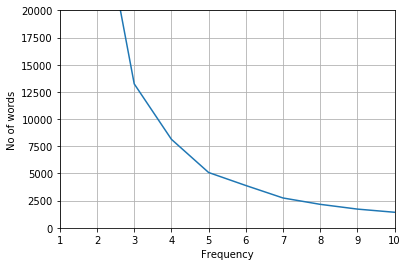

In [9]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()


In [10]:
# For deciding cutoff frequency
cutoff_freq=80
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) #here i am substracting the words with frequency (1 to 79)
print("count of  words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)

count of  words with frequency higher than cutoff frequency(80) : 4055


In [11]:
#  removing the  words which has low frequencies as they would not be significant 
features = []                  
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

In [42]:
# To represent training data as word vector counts
x_train_dataset = np.zeros((len(x_train),len(features)))
# This will take a lot  time to complete
for i in range(len(x_train)):
    word_list = [ word.strip().lower() for word in x_train[i][1].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1

In [43]:
x_test_dataset = np.zeros((len(x_test),len(features)))
# also it will take a lot  time to complete
for i in range(len(x_test)):
    word_list = [ word.strip().lower() for word in x_test[i][1].split()]
    for word in word_list:
        if word in features:
            x_test_dataset[i][features.index(word)]+= 1

In [44]:
# my own multinomial naive bayes implementation 
class MultinomialNaiveBayes:
    
    def __init__(self):
        # result is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.result = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,x_train,y_train):
        # This can take some time to complete       
        self.classes = set(y_train)
        for class_ in self.classes:
            self.result[class_] = {}
            for i in range(len(x_train[0])):
                self.result[class_][i] = 0
            self.result[class_]['total'] = 0
            self.result[class_]['total_points'] = 0
        self.result['total_points'] = len(x_train)
        
        for i in range(len(x_train)):
            for j in range(len(x_train[0])):
                self.result[y_train[i]][j]+=x_train[i][j]
                self.result[y_train[i]]['total']+=x_train[i][j]
            self.result[y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):  # in this function i have calculated the probabity and also handeled the laplace corection
        
        log_prob = np.log(self.result[class_]['total_points']) - np.log(self.result['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.result[class_][i]+1)-np.log(self.result[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,x_test):
        # This can take some time to complete
        y_pred = [] 
        for i in range(len(x_test)):
            y_pred.append( self.__predictSinglePoint(x_test[i]) )
        
        return y_pred
    
    def score(self,y_pred,y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_true[i]:
                count+=1
        return count/len(y_pred)

In [45]:
clf2 = MultinomialNaiveBayes()
clf2.fit(x_train_dataset,y_train)
y_test_pred = clf2.predict(x_test_dataset)
our_score_test = clf2.score(y_test_pred,y_test)  
print("my score on testing data :",our_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, y_test_pred))

Our score on testing data : 0.905785867880182
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.89      0.81       977
           comp.graphics       0.88      0.89      0.88       987
 comp.os.ms-windows.misc       0.88      0.93      0.90       993
comp.sys.ibm.pc.hardware       0.88      0.91      0.90       998
   comp.sys.mac.hardware       0.94      0.93      0.94      1009
          comp.windows.x       0.96      0.94      0.95      1001
            misc.forsale       0.89      0.90      0.90       992
               rec.autos       0.94      0.95      0.94       994
         rec.motorcycles       0.95      0.98      0.97       996
      rec.sport.baseball       1.00      0.99      0.99      1018
        rec.sport.hockey       0.99      0.98      0.99      1020
               sci.crypt       0.97      0.93      0.95      1030
         sci.electronics       0.92      0.93      0.

In [46]:
clf = MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_test_pred = clf.predict(x_test_dataset)
sklearn_score_train = clf.score(x_train_dataset,y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(x_test_dataset,y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, y_test_pred))

Sklearn's score on training data : 0.9147205414145455
Sklearn's score on testing data : 0.905785867880182
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.89      0.81       977
           comp.graphics       0.88      0.89      0.88       987
 comp.os.ms-windows.misc       0.88      0.93      0.90       993
comp.sys.ibm.pc.hardware       0.88      0.91      0.90       998
   comp.sys.mac.hardware       0.94      0.93      0.94      1009
          comp.windows.x       0.96      0.94      0.95      1001
            misc.forsale       0.89      0.90      0.90       992
               rec.autos       0.94      0.95      0.94       994
         rec.motorcycles       0.95      0.98      0.97       996
      rec.sport.baseball       1.00      0.99      0.99      1018
        rec.sport.hockey       0.99      0.98      0.99      1020
               sci.crypt       0.97      0.93      0.95    

In [8]:
import os

In [9]:
os.getcwd()

'C:\\Users\\hp'